In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

# Load data
iris = datasets.load_iris()

In [2]:
X, y = iris.data[:, :2], iris.target
# 50% for training and 50% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [4]:
C = 1.0 # regularization parameter
lin_svc = svm.LinearSVC(C=C, max_iter=10000)
lin_svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [5]:
# Display score on test set
lin_svc.score(X_test, y_test)

0.7866666666666666

Text(0.5, 1.0, 'LinearSVC')

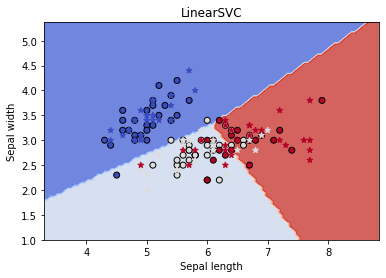

In [6]:
# Create the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# To display the decision surface we are discretizing the espace with a step h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Decision surface
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Display also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

array([1, 1, 2, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2,
       0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 1, 0,
       2, 0, 0, 1, 2, 0, 1, 2, 1])

Text(0.5, 1.0, 'LinearSVC')

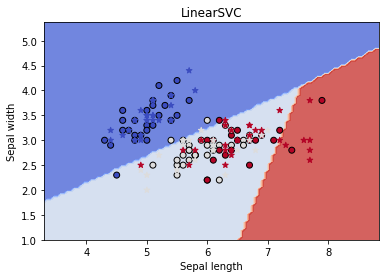

In [11]:
C = 0.1 # regularization parameter
lin_svc = svm.LinearSVC(C=C, max_iter=10000)
lin_svc.fit(X_train, y_train)

# Create the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# To display the decision surface we are discretizing the espace with a step h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Decision surface
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Display also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

Text(0.5, 1.0, 'LinearSVC')

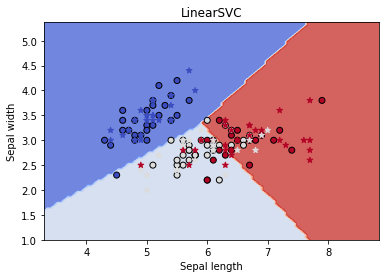

In [13]:
C = 10 # regularization parameter
lin_svc = svm.LinearSVC(C=C, max_iter=100000)
lin_svc.fit(X_train, y_train)

# Create the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
# To display the decision surface we are discretizing the espace with a step h
h = max((x_max - x_min) / 100, (y_max - y_min) / 100)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Decision surface
Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
# Display also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title("LinearSVC")

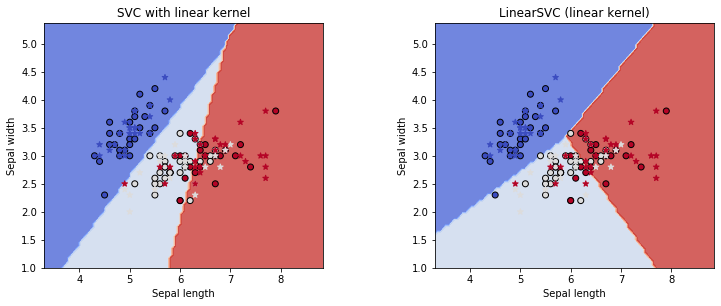

In [18]:
# cOMPARING LinearSVC and SVC classes

lin_svc = svm.LinearSVC(C=C, max_iter=100000).fit(X_train, y_train)
svc = svm.SVC(kernel='linear', C=C, max_iter=100000).fit(X_train, y_train)

titles = ['SVC with linear kernel', 'LinearSVC (linear kernel)']

fig = plt.figure(figsize=(12, 4.5))

for i, clf in enumerate((svc, lin_svc)):
    plt.subplot(1, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Utiliser une palette de couleurs
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    # Afficher aussi les points d'apprentissage
    plt.scatter(X_train[:, 0], X_train[:, 1], label="train", edgecolors='k', c=y_train, cmap=plt.cm.coolwarm)
    plt.scatter(X_test[:, 0], X_test[:, 1], label="test", marker='*', c=y_test, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title(titles[i])
plt.show()

In [21]:
# Now using the 4 parameters of iris dataset
X, y = iris.data, iris.target
# 50% for training and 50% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [22]:
C = 10 # regularization parameter
lin_svc = svm.LinearSVC(C=C, max_iter=100000)
lin_svc.fit(X_train, y_train)
# Display score on test set
lin_svc.score(X_test, y_test)

0.96